In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_scaled = X_train/255.0

In [5]:
autoencoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation='selu'),
    Dense(30),
    Dense(100, activation='selu'),
    Dense(28*28),
    Reshape((28,28))
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mae'
)

In [9]:
history = autoencoder.fit(
    X_train_scaled, 
    X_train_scaled,
    epochs=10,
    batch_size=32,
    verbose=0
)

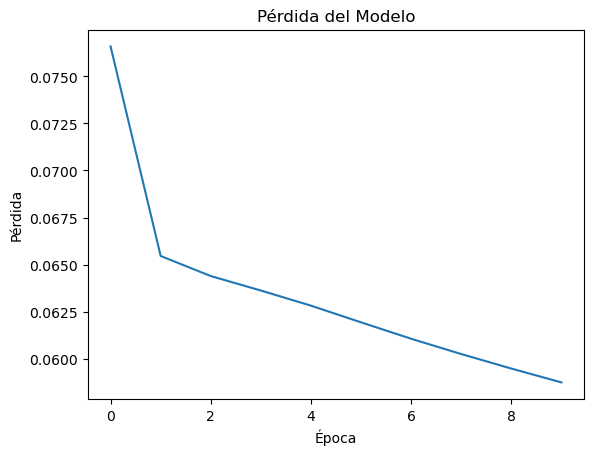

In [11]:
# Graficamos las pérdidas de entrenamiento
plt.plot(history.history['loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [13]:
encoder = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation='selu'),
    Dense(30)
])

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
encoder.layers[1].set_weights(autoencoder.layers[1].get_weights())
encoder.layers[2].set_weights(autoencoder.layers[2].get_weights())

In [17]:
encoder.compile()

In [19]:
latent_vectors = encoder.predict(X_train_scaled)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [21]:
# Reduciendo dimensionalidad de 30D a 2D usando TSNE
tsne = TSNE()
X_validas = tsne.fit_transform(latent_vectors)

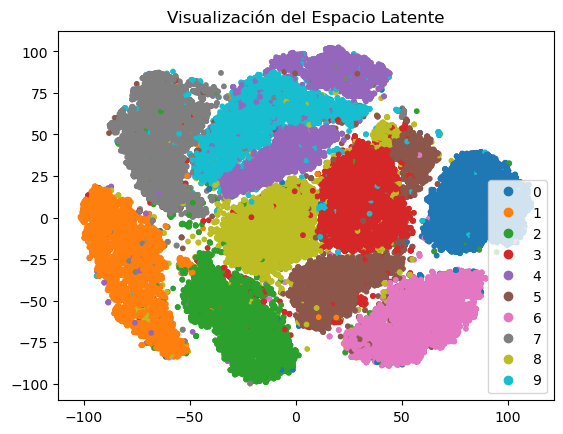

In [23]:
scatter = plt.scatter(X_validas[:,0], X_validas[:,1], 
                     c=y_train, s=10, cmap="tab10")
plt.title('Visualización del Espacio Latente')
plt.legend(handles=scatter.legend_elements()[0], 
          labels=["0","1","2","3","4","5","6","7","8","9"])
plt.show()